# Final Mini Project - COMP 3132

let us introduce the dataset and explain the problem so that we can tackle a solution.

The Churn Model - [Kaggle](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)

A Data Set that has customer information such as age, balance, estimated salary and a 0 or 1 in case the customer left the bank (Exited).

There are 10,000 customers (randomly selected), as there are 10,000 rows. The bank wants to address an alarming turnover rate, and make prediction onto new customers. Maybe in that way it can address different business needs for targeted customres.

Our goal is to create a model, that can tell which customers would have a high probability of leaving.

It is inportant to take into consideration that this project is a school project, however some organiztions may have to address such problem and may ask a developer (such as me in this case) to find a solution that fits their needs, by a NN. 

This NN deals with classification.

### Let us import the necessary moduels.

In [76]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Some data preprocessing

### Importing the dataset

In [77]:
dataset = pd.read_csv('./sample_data/Churn_Modelling.csv')
# We should omit some columns that are not important for our prediction (Number: 0, 1, 2)
# The other they do have an impact to the dependent variable.
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [78]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [79]:
print(y)

[1 0 1 ... 1 1 0]


### Some columns include categorical data, and we know that those should be encoded to numbers. (OneHotEncoer)

Encode Coulumn 'gender'

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [81]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Encode Coulumn 'geography'

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [83]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [126]:
from sklearn.model_selection import train_test_split
train_data, train_targets, test_data, test_targets = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_data)
X_test = sc.transform(train_targets)

## Let's try our first shot


In [105]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, test_data, batch_size=50, epochs=55, validation_split=0.2)

Epoch 1/55
128/128 [==============================] - 1s 4ms/step - loss: 0.4670 - accuracy: 0.7956 - val_loss: 0.4221 - val_accuracy: 0.8200
Epoch 2/55
128/128 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8355 - val_loss: 0.3810 - val_accuracy: 0.8425
Epoch 3/55
128/128 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8508 - val_loss: 0.3662 - val_accuracy: 0.8469
Epoch 4/55
128/128 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.8609 - val_loss: 0.3546 - val_accuracy: 0.8637
Epoch 5/55
128/128 [==============================] - 0s 3ms/step - loss: 0.3343 - accuracy: 0.8631 - val_loss: 0.3549 - val_accuracy: 0.8612
Epoch 6/55
128/128 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8633 - val_loss: 0.3525 - val_accuracy: 0.8562
Epoch 7/55
128/128 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.8664 - val_loss: 0.3541 - val_accuracy: 0.8550
Epoch 

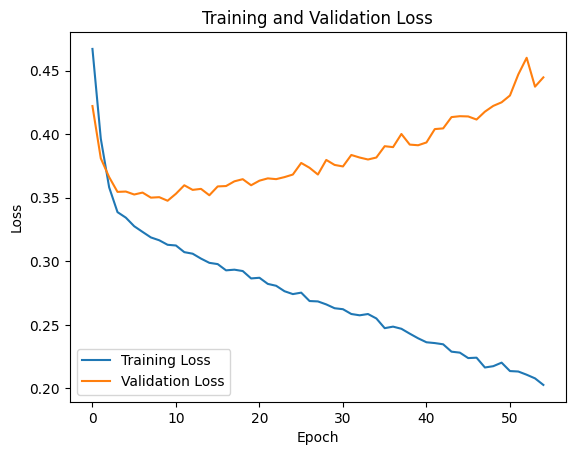

In [106]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

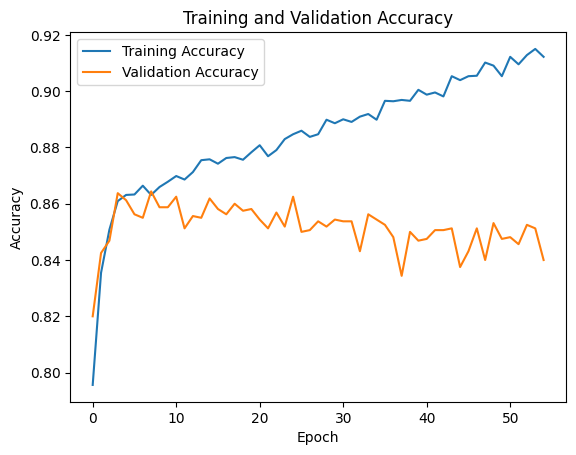

In [107]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Let's try our second shot

In [110]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=25, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, test_data, batch_size=32, epochs=75, validation_split=0.2)

Epoch 1/75
200/200 [==============================] - 58s 3ms/step - loss: 0.4557 - accuracy: 0.8034 - val_loss: 0.4236 - val_accuracy: 0.8119
Epoch 2/75
200/200 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8302 - val_loss: 0.3969 - val_accuracy: 0.8350
Epoch 3/75
200/200 [==============================] - 1s 3ms/step - loss: 0.3709 - accuracy: 0.8477 - val_loss: 0.3744 - val_accuracy: 0.8413
Epoch 4/75
200/200 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8536 - val_loss: 0.3627 - val_accuracy: 0.8537
Epoch 5/75
200/200 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8589 - val_loss: 0.3595 - val_accuracy: 0.8562
Epoch 6/75
200/200 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8614 - val_loss: 0.3577 - val_accuracy: 0.8550
Epoch 7/75
200/200 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8609 - val_loss: 0.3570 - val_accuracy: 0.8556
Epoch

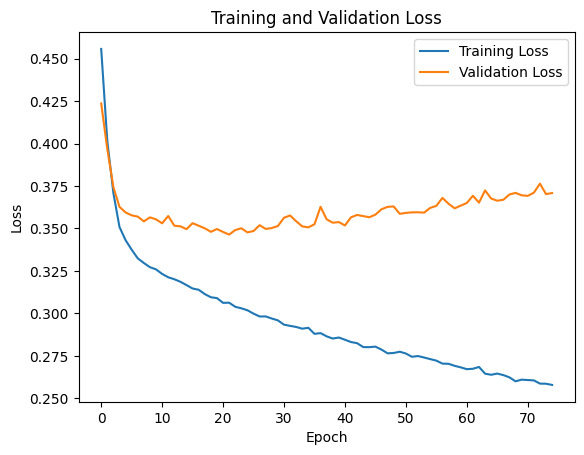

In [111]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

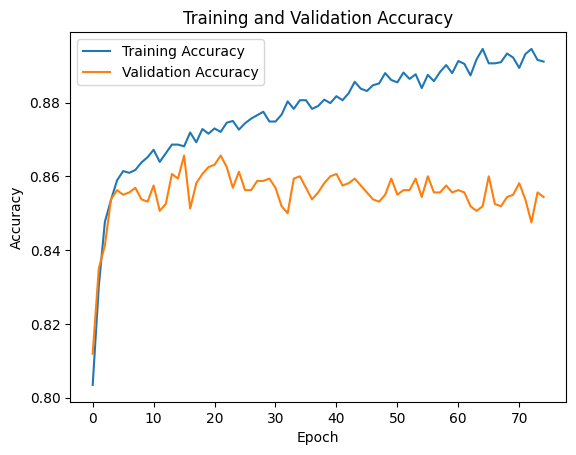

In [112]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## The Ideal solution...

In [113]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_data, test_data, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6620 - accuracy: 0.6266 - val_loss: 0.5681 - val_accuracy: 0.7738
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7897 - val_loss: 0.4902 - val_accuracy: 0.8006
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8033 - val_loss: 0.4567 - val_accuracy: 0.8056
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8094 - val_loss: 0.4390 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4249 - accuracy: 0.8156 - val_loss: 0.4298 - val_accuracy: 0.8031
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8186 - val_loss: 0.4218 - val_accuracy: 0.8087
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4046 - accuracy: 0.8258 - val_loss: 0.4117 - val_accuracy: 0.8138

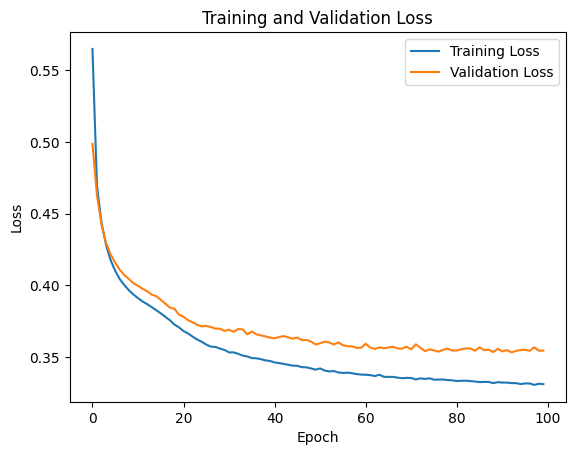

In [103]:
# plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

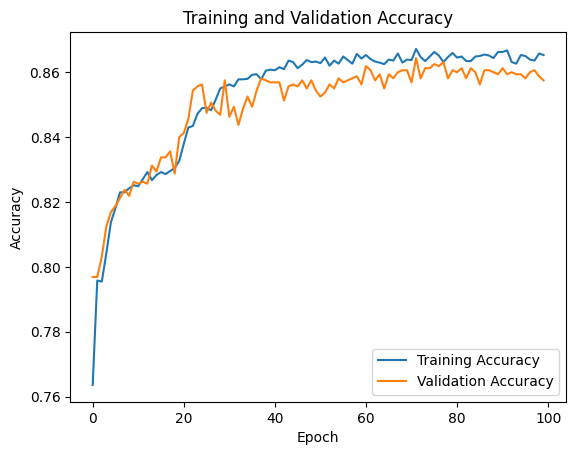

In [104]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

### Predicting the result of a single observation

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [128]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 22ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [129]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_targets.reshape(len(test_targets),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_targets, y_pred)
print(cm)
accuracy_score(test_targets, y_pred)

[[1527   68]
 [ 205  200]]


0.8635

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: Germany

Credit Score: 200

Gender: Female

Age: 22 years old

Tenure: 2 years

Balance: \$ 20000

Number of Products: 1

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 10000

So, should we say goodbye to that customer?

In [130]:
print(model.predict(sc.transform([[0, 1, 0, 600, 0, 22, 2, 20000, 0, 0, 0, 5000]])) > 0.5)

1/1 [==============================] - 0s 27ms/step
[[ True]]


In [131]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), test_targets.reshape(len(test_targets),1)),1))

63/63 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_targets, y_pred)
print(cm)
accuracy_score(test_targets, y_pred)

[[1494  101]
 [ 179  226]]


0.86